In [1]:
import csv
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from ast import literal_eval
from sklearn.preprocessing import OneHotEncoder

In [108]:
df = pd.read_csv("dev.tsv",delimiter="\t")
val = pd.read_csv("eval.tsv",delimiter="\t")

In [27]:
df=df.astype({'artists': 'category','key':'category','id':'category'})

In [4]:
df.head()

valence  year  acousticness                                        artists  \
0   0.7060  1963         0.334                                ['The Beatles']   
1   0.0324  1953         0.954        ['Richard Strauss', 'Arturo Toscanini']   
2   0.2590  1964         0.864       ['Monica Zetterlund', 'Bill Evans Trio']   
3   0.3630  1963         0.825                                ['Roy Orbison']   
4   0.8640  1973         0.520  ['Héctor Lavoe', 'Willie Colón', 'Yomo Toro']   

   danceability  duration_ms  energy  explicit                      id  \
0         0.527       120853  0.4800         0  6EHuOufBeL6vk3TvVJB5qo   
1         0.192       322693  0.0373         0  19RcQUOpftf7DqH0RogEQs   
2         0.500       282533  0.2070         0  7BT5Abw12iVWLVo1tKb9Qu   
3         0.508       140307  0.2890         0  1UgHqzVHOYpqM0rjm81ZYA   
4         0.636       269520  0.6790         0  1uohFd173KrmJiDjiOooLw   

   instrumentalness key  liveness  loudness  popularity  speechiness    tempo  \
0          0.000000   4    0.0702    -9.610          61       0.0280  139.388   
1          0.519000   5    0.1430   -28.496           0       0.0406   79.257   
2          0.000696   0    0.1060   -16.817          29       0.0391   94.662   
3          0.001240   5    0.1430   -11.068          22       0.0244   93.240   
4          0.000000   7    0.0601    -6.410          41       0.0690   93.914   

   mode  
0     1  
1     0  
2     0  
3     1  
4     1

In [5]:
len(df), len(val)

(136522, 34131)

In [6]:
len(df)-len(df.drop_duplicates())

0

### No duplicates

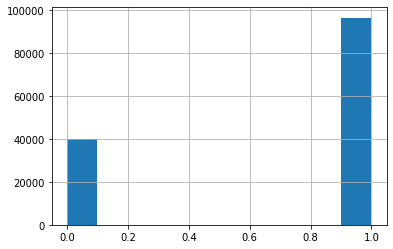

In [7]:
df["mode"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000270CE55F308>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

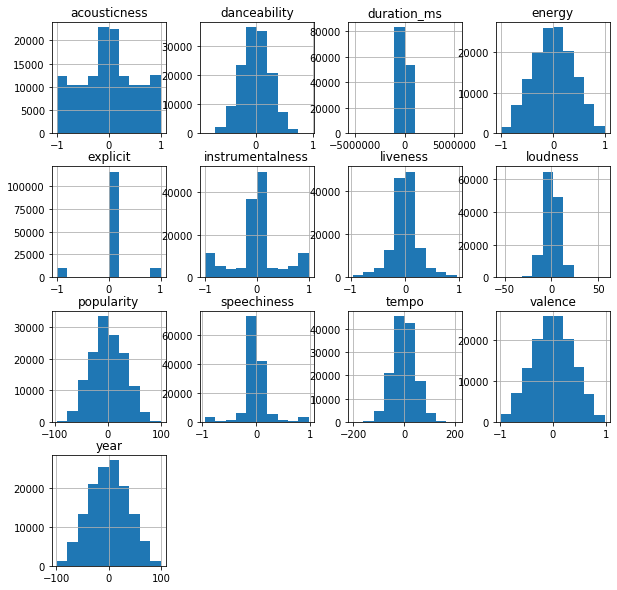

In [8]:
plt.figure()
df.drop(columns=["artists","id","key","mode"]).diff().hist(figsize=(10,10))

### Take all the features with an apparent normal distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014100327648>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

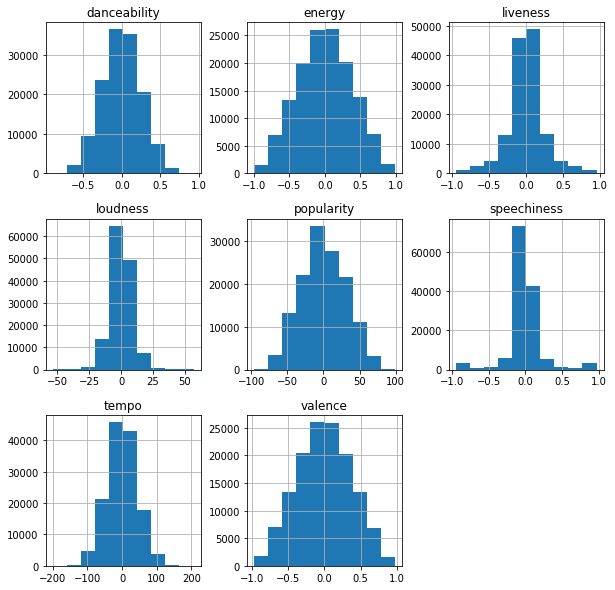

In [8]:
df1 = df[["valence","danceability","energy","liveness","loudness","popularity","speechiness","tempo"]]
plt.figure()
df1.diff().hist(figsize=(10,10))

liveness
2.1557287090693538


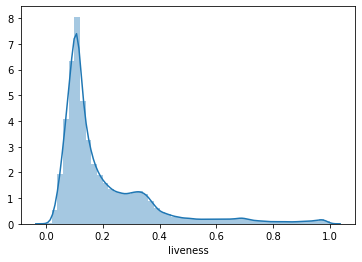

loudness
-1.0556972900376858


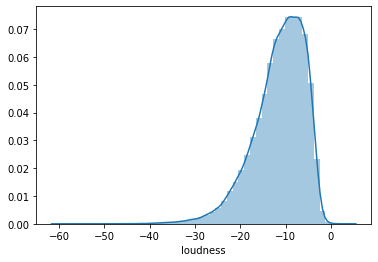

speechiness
4.050526881280769


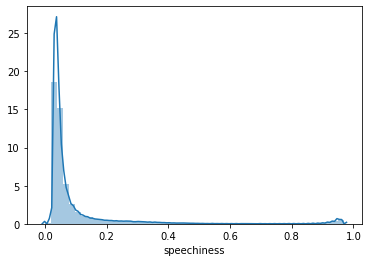

In [9]:
for col in df1:
    if abs(df[col].skew()) > 0.5: 
        print(col)
        print(df1[col].skew())
        
        plt.figure()
        sb.distplot(df1[col])
        plt.show()

In [106]:
ns = np.sqrt(np.sqrt(df1["liveness"]))
print(ns.skew(), ns.kurtosis())

0.8764561439719802 0.46573197586569703


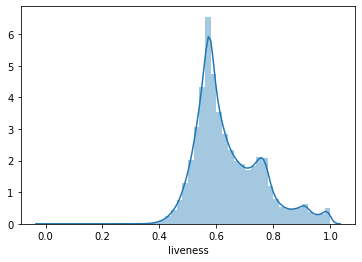

In [107]:
plt.figure()
sb.distplot(ns)
plt.show()

In [86]:
aa = X.drop(columns=["liveness"])
aa["liveness"] = ns

In [44]:
for col in df1:
    print(col)
    print(df[col].kurtosis())

valence
-1.0649270091290597
danceability
-0.4394306346911052
energy
-1.0999523607396755
liveness
5.01982232050257
loudness
1.843058084030305
popularity
-1.0266459430311177
speechiness
17.031800321923015
tempo
-0.0786429131223314


In [109]:
ns = np.sqrt(np.sqrt(df["speechiness"]))
print(ns.skew(), ns.kurtosis())

2.1534935195906546 5.207764942327568


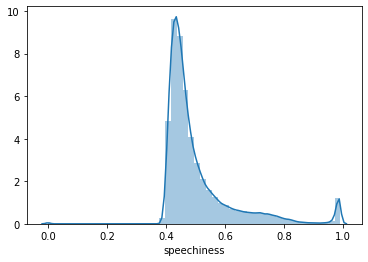

In [110]:
plt.figure()
sb.distplot(ns)
plt.show()

In [103]:
aa = aa.drop(columns=["speechiness"])
aa["speechiness"] = ns

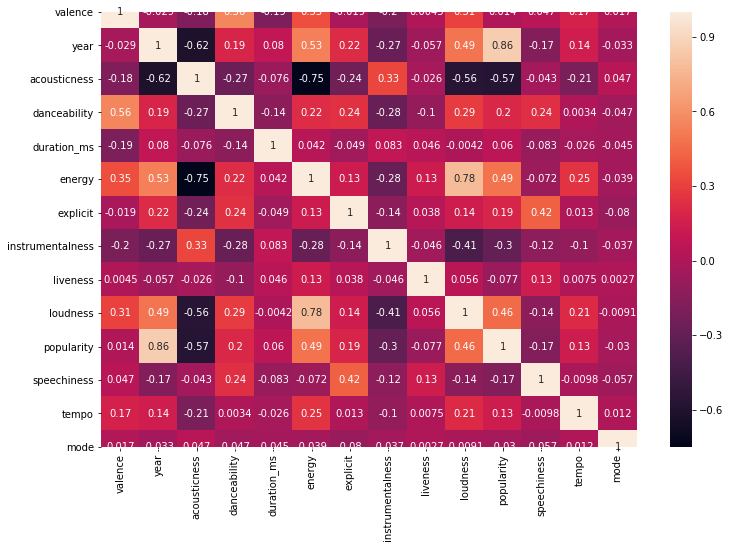

In [110]:
fd = (12,8)
fig, ax = plt.subplots(figsize=fd)
sb.heatmap(df.corr(),ax=ax,annot=True)
plt.show()

In [292]:
abs(df.corr()[abs(df.corr() > 0.5)])

valence      year  acousticness  danceability  duration_ms  \
valence           1.000000       NaN           NaN      0.557583          NaN   
year                   NaN  1.000000           NaN           NaN          NaN   
acousticness           NaN       NaN           1.0           NaN          NaN   
danceability      0.557583       NaN           NaN      1.000000          NaN   
duration_ms            NaN       NaN           NaN           NaN          1.0   
energy                 NaN  0.531592           NaN           NaN          NaN   
explicit               NaN       NaN           NaN           NaN          NaN   
instrumentalness       NaN       NaN           NaN           NaN          NaN   
liveness               NaN       NaN           NaN           NaN          NaN   
loudness               NaN       NaN           NaN           NaN          NaN   
popularity             NaN  0.862398           NaN           NaN          NaN   
speechiness            NaN       NaN           NaN           NaN          NaN   
tempo                  NaN       NaN           NaN           NaN          NaN   
mode                   NaN       NaN           NaN           NaN          NaN   

                    energy  explicit  instrumentalness  liveness  loudness  \
valence                NaN       NaN               NaN       NaN       NaN   
year              0.531592       NaN               NaN       NaN       NaN   
acousticness           NaN       NaN               NaN       NaN       NaN   
danceability           NaN       NaN               NaN       NaN       NaN   
duration_ms            NaN       NaN               NaN       NaN       NaN   
energy            1.000000       NaN               NaN       NaN  0.782236   
explicit               NaN       1.0               NaN       NaN       NaN   
instrumentalness       NaN       NaN               1.0       NaN       NaN   
liveness               NaN       NaN               NaN       1.0       NaN   
loudness          0.782236       NaN               NaN       NaN  1.000000   
popularity             NaN       NaN               NaN       NaN       NaN   
speechiness            NaN       NaN               NaN       NaN       NaN   
tempo                  NaN       NaN               NaN       NaN       NaN   
mode                   NaN       NaN               NaN       NaN       NaN   

                  popularity  speechiness  tempo  mode  
valence                  NaN          NaN    NaN   NaN  
year                0.862398          NaN    NaN   NaN  
acousticness             NaN          NaN    NaN   NaN  
danceability             NaN          NaN    NaN   NaN  
duration_ms              NaN          NaN    NaN   NaN  
energy                   NaN          NaN    NaN   NaN  
explicit                 NaN          NaN    NaN   NaN  
instrumentalness         NaN          NaN    NaN   NaN  
liveness                 NaN          NaN    NaN   NaN  
loudness                 NaN          NaN    NaN   NaN  
popularity          1.000000          NaN    NaN   NaN  
speechiness              NaN          1.0    NaN   NaN  
tempo                    NaN          NaN    1.0   NaN  
mode                     NaN          NaN    NaN   1.0

In [71]:
abs(df.corr()["mode"][abs(df.corr()["mode"]) > 0.04])

acousticness    0.047290
danceability    0.046677
duration_ms     0.045345
explicit        0.080133
speechiness     0.057086
mode            1.000000
Name: mode, dtype: float64

In [5]:
df.groupby(by="mode").mean().round(2)

valence     year  acousticness  danceability  duration_ms  energy  \
mode                                                                      
0        0.52  1978.13          0.47          0.55    240061.37    0.50   
1        0.53  1976.24          0.51          0.53    227329.92    0.48   

      explicit  instrumentalness  liveness  loudness  popularity  speechiness  \
mode                                                                            
0         0.12              0.19      0.20    -11.39       32.44         0.11   
1         0.07              0.16      0.21    -11.50       31.01         0.09   

       tempo  
mode          
0     116.32  
1     117.16

### Remove columns that have low difference in mean between the two modes

In [15]:
second_cols = ["artists","valence","year","danceability","energy","instrumentalness","liveness","id","loudness","popularity","tempo","mode"]
second = df.drop(columns = second_cols)

In [9]:
X_cols = ["artists","id","mode"]
X = df.drop(columns=X_cols)
y = df["mode"]

# Preprocessing #

In [283]:
print(np.shape(find_outliers_tukey(df["instrumentalness"])))

(2, 28876)


In [285]:
print(np.shape(find_outliers_tukey(df["explicit"])))

(2, 11524)


In [106]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_s = pd.DataFrame(enc.fit_transform(second[['key']]).toarray())
second = second.join(enc_s)

enc_v = pd.DataFrame(enc.fit_transform(val[['key']]).toarray())
val = val.drop(columns=["key"]).join(enc_v)

# All useful functions #

In [10]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3+1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

def print_csv(model, cols):
    pre = model.predict(val.drop(columns=[col for col in cols if col != "mode"]))
    pd.Series(pre).to_csv("sub.csv")
    
def evaluate(y_true, y_pred):
    return f1_score(y_true, y_pred, average="macro")

def results_table(gs):
    return pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False).head()

# First tries with simple models #

In [37]:
X_train, X_test, y_train, y_test = train_test_split(second, y, test_size=0.3, random_state=42)

In [56]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
evaluate(KNN.predict(X_test),y_test)

0.5147618406280814

In [13]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
evaluate(clf.predict(X_test),y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6115314088725772

## Improving second subset performance

In [42]:
print(second.columns, second_cols)

Index(['acousticness',  'duration_ms',     'explicit',          'key',
        'speechiness',              0,              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11],
      dtype='object') ['artists', 'valence', 'year', 'danceability', 'energy', 'instrumentalness', 'liveness', 'id', 'loudness', 'popularity', 'tempo', 'mode']


In [75]:
added_cols = ["valence","danceability","energy","instrumentalness","loudness"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(second, y, test_size=0.3, random_state=42)
clf.fit(X_train,y_train)
evaluate(clf.predict(X_test),y_test)

0.6237266090991671

In [ ]:
second_cols.remove(x for x in added_cols)

In [80]:
second.columns

Index([    'acousticness',      'duration_ms',         'explicit',
            'speechiness',                  0,                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9,                 10,
                       11,          'valence',     'danceability',
                 'energy', 'instrumentalness',         'loudness'],
      dtype='object')

In [74]:
print(second_cols)

['artists', 'year', 'liveness', 'id', 'popularity', 'tempo', 'mode']


## Testing first subset

In [20]:
enc_x = pd.DataFrame(enc.fit_transform(X[['key']]).toarray())
X = X.drop(columns=["key"]).join(enc_x)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(aa, y, test_size=0.3, random_state=42)
clf.fit(X_train,y_train)
evaluate(clf.predict(X_test),y_test)

0.623961160066942

In [111]:
rf=Pipeline([   
    ("scaler",StandardScaler()),
    ('random_forest',RandomForestClassifier(max_depth = 50, n_estimators = 50))
])
rf.fit(X_train,y_train)
evaluate(rf.predict(X_test),y_test)

0.6244887611502822

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
clf.fit(X_train,y_train)
evaluate(clf.predict(X_test),y_test)

0.6223867148298066

### By considering all the features except id and artists, and applying OHE to the key, we have already a real better value

In [18]:
print(second_cols)

['artists', 'valence', 'year', 'danceability', 'energy', 'instrumentalness', 'liveness', 'id', 'loudness', 'popularity', 'tempo', 'mode']


In [17]:
second.head()

acousticness  duration_ms  explicit key  speechiness    0    1    2    3  \
0         0.334       120853         0   4       0.0280  0.0  0.0  0.0  0.0   
1         0.954       322693         0   5       0.0406  0.0  0.0  0.0  0.0   
2         0.864       282533         0   0       0.0391  1.0  0.0  0.0  0.0   
3         0.825       140307         0   5       0.0244  0.0  0.0  0.0  0.0   
4         0.520       269520         0   7       0.0690  0.0  0.0  0.0  0.0   

     4    5    6    7    8    9   10   11  
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [87]:
X_train, X_test, y_train, y_test = train_test_split(second, y, test_size=0.3, random_state=42)

In [257]:
clf = RandomForestClassifier(max_depth = 50, n_estimators = 50)
clf.fit(X_train,y_train)
evaluate(clf.predict(X_test),y_test)

0.6082550017681735

# Hyperparameters tuning

In [88]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [89]:
rf=Pipeline([   
    ("scaler",StandardScaler()),
    ('random_forest',RandomForestClassifier())
])

parameters=[
    {
        'scaler': [None,StandardScaler()],
        'random_forest__n_estimators': [10,50,100],
        'random_forest__max_depth': [15,30,50]
    },
]

gs =GridSearchCV(rf,param_grid=parameters,cv=kf,n_jobs=2,scoring="f1_macro")
gs.fit(second,y)
gs.best_score_

0.6272811135866326

In [90]:
gs.best_params_

{'random_forest__max_depth': 50,
 'random_forest__n_estimators': 10,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [91]:
results_table(gs)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       3.175196      0.143577         0.121399        0.004587   
12       2.873396      0.225920         0.110200        0.013167   
14      15.280399      1.352680         0.477002        0.004773   
15      14.385190      0.162064         0.481006        0.012709   
16      29.043590      0.243315         1.002406        0.029376   

   param_random_forest__max_depth param_random_forest__n_estimators  \
13                             50                                10   
12                             50                                10   
14                             50                                50   
15                             50                                50   
16                             50                               100   

                                         param_scaler  \
13  StandardScaler(copy=True, with_mean=True, with...   
12                                               None   
14                                               None   
15  StandardScaler(copy=True, with_mean=True, with...   
16                                               None   

                                               params  split0_test_score  \
13  {'random_forest__max_depth': 50, 'random_fores...           0.627665   
12  {'random_forest__max_depth': 50, 'random_fores...           0.628998   
14  {'random_forest__max_depth': 50, 'random_fores...           0.623546   
15  {'random_forest__max_depth': 50, 'random_fores...           0.625759   
16  {'random_forest__max_depth': 50, 'random_fores...           0.626541   

    split1_test_score  split2_test_score  split3_test_score  \
13           0.625129           0.625785           0.628599   
12           0.626411           0.626879           0.627440   
14           0.622928           0.626647           0.629925   
15           0.623779           0.622971           0.630067   
16           0.621697           0.622534           0.626295   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
13           0.629228         0.627281        0.001584                1  
12           0.624411         0.626828        0.001490                2  
14           0.628672         0.626344        0.002751                3  
15           0.627698         0.626055        0.002591                4  
16           0.628105         0.625034        0.002477                5

In [313]:
rf=Pipeline([   
    ("rscaler",RobustScaler()),
    ("sscaler",None),
    ('random_forest',gs.best_estimator_["random_forest"])
])

parameters=[
    {
        'rscaler': [None,RobustScaler()],
        'sscaler': [None,StandardScaler()]
    },
]

gs =GridSearchCV(rf,param_grid=parameters,cv=kf,n_jobs=2,scoring="f1_macro")
gs.fit(X,y)
gs.best_score_

0.626416587310028

In [314]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('rscaler', None), ('sscaler', None),
                ('random_forest',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=50,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [109]:
tr = df.drop(columns=["id","mode"])
tr["artists"] = df["artists"]
tr.head()

valence  year  acousticness                                        artists  \
0   0.7060  1963         0.334                                ['The Beatles']   
1   0.0324  1953         0.954        ['Richard Strauss', 'Arturo Toscanini']   
2   0.2590  1964         0.864       ['Monica Zetterlund', 'Bill Evans Trio']   
3   0.3630  1963         0.825                                ['Roy Orbison']   
4   0.8640  1973         0.520  ['Héctor Lavoe', 'Willie Colón', 'Yomo Toro']   

   danceability  duration_ms  energy  explicit  instrumentalness  key  \
0         0.527       120853  0.4800         0          0.000000    4   
1         0.192       322693  0.0373         0          0.519000    5   
2         0.500       282533  0.2070         0          0.000696    0   
3         0.508       140307  0.2890         0          0.001240    5   
4         0.636       269520  0.6790         0          0.000000    7   

   liveness  loudness  popularity  speechiness    tempo  
0    0.0702    -9.610          61       0.0280  139.388  
1    0.1430   -28.496           0       0.0406   79.257  
2    0.1060   -16.817          29       0.0391   94.662  
3    0.1430   -11.068          22       0.0244   93.240  
4    0.0601    -6.410          41       0.0690   93.914

# Better external model

In [25]:
from catboost import CatBoostClassifier

In [165]:
cbr = CatBoostClassifier()

X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.3, random_state=42)
cbr.fit(X_train, y_train,cat_features=["artists"])


Learning rate set to 0.072197
0:	learn: 0.6779325	total: 145ms	remaining: 2m 24s
1:	learn: 0.6637393	total: 288ms	remaining: 2m 23s
2:	learn: 0.6522995	total: 426ms	remaining: 2m 21s
3:	learn: 0.6414839	total: 558ms	remaining: 2m 18s
4:	learn: 0.6325670	total: 696ms	remaining: 2m 18s
5:	learn: 0.6247209	total: 852ms	remaining: 2m 21s
6:	learn: 0.6180566	total: 1.01s	remaining: 2m 23s
7:	learn: 0.6121135	total: 1.17s	remaining: 2m 25s
8:	learn: 0.6071344	total: 1.32s	remaining: 2m 25s
9:	learn: 0.6021906	total: 1.5s	remaining: 2m 28s
10:	learn: 0.5983782	total: 1.67s	remaining: 2m 30s
11:	learn: 0.5949804	total: 1.88s	remaining: 2m 34s
12:	learn: 0.5919166	total: 2.03s	remaining: 2m 34s
13:	learn: 0.5880373	total: 2.19s	remaining: 2m 34s
14:	learn: 0.5854202	total: 2.33s	remaining: 2m 33s
15:	learn: 0.5828949	total: 2.47s	remaining: 2m 31s
16:	learn: 0.5809424	total: 2.61s	remaining: 2m 30s
17:	learn: 0.5777350	total: 2.74s	remaining: 2m 29s
18:	learn: 0.5751481	total: 2.86s	remaining: 

159:	learn: 0.5276552	total: 24.2s	remaining: 2m 6s
160:	learn: 0.5275137	total: 24.3s	remaining: 2m 6s
161:	learn: 0.5274128	total: 24.4s	remaining: 2m 6s
162:	learn: 0.5273116	total: 24.5s	remaining: 2m 5s
163:	learn: 0.5272087	total: 24.7s	remaining: 2m 5s
164:	learn: 0.5270995	total: 24.8s	remaining: 2m 5s
165:	learn: 0.5270173	total: 24.9s	remaining: 2m 5s
166:	learn: 0.5268333	total: 25s	remaining: 2m 4s
167:	learn: 0.5267598	total: 25.2s	remaining: 2m 4s
168:	learn: 0.5266709	total: 25.3s	remaining: 2m 4s
169:	learn: 0.5265745	total: 25.4s	remaining: 2m 4s
170:	learn: 0.5264245	total: 25.6s	remaining: 2m 3s
171:	learn: 0.5263107	total: 25.7s	remaining: 2m 3s
172:	learn: 0.5262096	total: 25.8s	remaining: 2m 3s
173:	learn: 0.5260652	total: 25.9s	remaining: 2m 3s
174:	learn: 0.5259642	total: 26.1s	remaining: 2m 3s
175:	learn: 0.5258611	total: 26.3s	remaining: 2m 3s
176:	learn: 0.5257674	total: 26.5s	remaining: 2m 3s
177:	learn: 0.5256341	total: 26.7s	remaining: 2m 3s
178:	learn: 0.

316:	learn: 0.5121080	total: 46.7s	remaining: 1m 40s
317:	learn: 0.5120063	total: 46.8s	remaining: 1m 40s
318:	learn: 0.5119470	total: 46.9s	remaining: 1m 40s
319:	learn: 0.5118872	total: 47.1s	remaining: 1m 40s
320:	learn: 0.5118380	total: 47.2s	remaining: 1m 39s
321:	learn: 0.5117689	total: 47.4s	remaining: 1m 39s
322:	learn: 0.5116991	total: 47.5s	remaining: 1m 39s
323:	learn: 0.5116076	total: 47.7s	remaining: 1m 39s
324:	learn: 0.5115213	total: 47.8s	remaining: 1m 39s
325:	learn: 0.5114501	total: 47.9s	remaining: 1m 39s
326:	learn: 0.5113485	total: 48.1s	remaining: 1m 38s
327:	learn: 0.5113113	total: 48.2s	remaining: 1m 38s
328:	learn: 0.5112346	total: 48.3s	remaining: 1m 38s
329:	learn: 0.5111263	total: 48.4s	remaining: 1m 38s
330:	learn: 0.5110596	total: 48.5s	remaining: 1m 38s
331:	learn: 0.5109993	total: 48.6s	remaining: 1m 37s
332:	learn: 0.5109424	total: 48.7s	remaining: 1m 37s
333:	learn: 0.5107944	total: 48.8s	remaining: 1m 37s
334:	learn: 0.5107310	total: 48.9s	remaining: 

472:	learn: 0.5007790	total: 1m 6s	remaining: 1m 14s
473:	learn: 0.5007000	total: 1m 7s	remaining: 1m 14s
474:	learn: 0.5006428	total: 1m 7s	remaining: 1m 14s
475:	learn: 0.5005719	total: 1m 7s	remaining: 1m 14s
476:	learn: 0.5005109	total: 1m 7s	remaining: 1m 14s
477:	learn: 0.5004348	total: 1m 7s	remaining: 1m 13s
478:	learn: 0.5003562	total: 1m 7s	remaining: 1m 13s
479:	learn: 0.5002964	total: 1m 7s	remaining: 1m 13s
480:	learn: 0.5002348	total: 1m 7s	remaining: 1m 13s
481:	learn: 0.5001713	total: 1m 8s	remaining: 1m 13s
482:	learn: 0.5000809	total: 1m 8s	remaining: 1m 13s
483:	learn: 0.5000053	total: 1m 8s	remaining: 1m 12s
484:	learn: 0.4999387	total: 1m 8s	remaining: 1m 12s
485:	learn: 0.4998815	total: 1m 8s	remaining: 1m 12s
486:	learn: 0.4998327	total: 1m 8s	remaining: 1m 12s
487:	learn: 0.4997668	total: 1m 8s	remaining: 1m 12s
488:	learn: 0.4997276	total: 1m 8s	remaining: 1m 12s
489:	learn: 0.4996646	total: 1m 9s	remaining: 1m 11s
490:	learn: 0.4996305	total: 1m 9s	remaining: 

628:	learn: 0.4914565	total: 1m 28s	remaining: 52.1s
629:	learn: 0.4913953	total: 1m 28s	remaining: 52s
630:	learn: 0.4913262	total: 1m 28s	remaining: 51.8s
631:	learn: 0.4912750	total: 1m 28s	remaining: 51.7s
632:	learn: 0.4912142	total: 1m 28s	remaining: 51.5s
633:	learn: 0.4911586	total: 1m 28s	remaining: 51.4s
634:	learn: 0.4911010	total: 1m 29s	remaining: 51.2s
635:	learn: 0.4910436	total: 1m 29s	remaining: 51.1s
636:	learn: 0.4909853	total: 1m 29s	remaining: 50.9s
637:	learn: 0.4909421	total: 1m 29s	remaining: 50.8s
638:	learn: 0.4908848	total: 1m 29s	remaining: 50.6s
639:	learn: 0.4908117	total: 1m 29s	remaining: 50.5s
640:	learn: 0.4907723	total: 1m 29s	remaining: 50.3s
641:	learn: 0.4907014	total: 1m 30s	remaining: 50.2s
642:	learn: 0.4906609	total: 1m 30s	remaining: 50.1s
643:	learn: 0.4905983	total: 1m 30s	remaining: 50s
644:	learn: 0.4905435	total: 1m 30s	remaining: 49.8s
645:	learn: 0.4904855	total: 1m 30s	remaining: 49.7s
646:	learn: 0.4904342	total: 1m 30s	remaining: 49.

785:	learn: 0.4829093	total: 2m 1s	remaining: 33s
786:	learn: 0.4828434	total: 2m 1s	remaining: 32.9s
787:	learn: 0.4827847	total: 2m 1s	remaining: 32.8s
788:	learn: 0.4827459	total: 2m 2s	remaining: 32.6s
789:	learn: 0.4826960	total: 2m 2s	remaining: 32.5s
790:	learn: 0.4826608	total: 2m 2s	remaining: 32.3s
791:	learn: 0.4826179	total: 2m 2s	remaining: 32.2s
792:	learn: 0.4825798	total: 2m 2s	remaining: 32s
793:	learn: 0.4825352	total: 2m 2s	remaining: 31.9s
794:	learn: 0.4825039	total: 2m 3s	remaining: 31.7s
795:	learn: 0.4824568	total: 2m 3s	remaining: 31.6s
796:	learn: 0.4823923	total: 2m 3s	remaining: 31.4s
797:	learn: 0.4823228	total: 2m 3s	remaining: 31.3s
798:	learn: 0.4822961	total: 2m 3s	remaining: 31.1s
799:	learn: 0.4822371	total: 2m 3s	remaining: 31s
800:	learn: 0.4821939	total: 2m 4s	remaining: 30.8s
801:	learn: 0.4821401	total: 2m 4s	remaining: 30.7s
802:	learn: 0.4820573	total: 2m 4s	remaining: 30.5s
803:	learn: 0.4819911	total: 2m 4s	remaining: 30.4s
804:	learn: 0.4819

943:	learn: 0.4750434	total: 2m 24s	remaining: 8.54s
944:	learn: 0.4749975	total: 2m 24s	remaining: 8.39s
945:	learn: 0.4749777	total: 2m 24s	remaining: 8.23s
946:	learn: 0.4749373	total: 2m 24s	remaining: 8.08s
947:	learn: 0.4748843	total: 2m 24s	remaining: 7.93s
948:	learn: 0.4748221	total: 2m 24s	remaining: 7.77s
949:	learn: 0.4747852	total: 2m 24s	remaining: 7.62s
950:	learn: 0.4747575	total: 2m 24s	remaining: 7.46s
951:	learn: 0.4747239	total: 2m 25s	remaining: 7.31s
952:	learn: 0.4746741	total: 2m 25s	remaining: 7.16s
953:	learn: 0.4746307	total: 2m 25s	remaining: 7s
954:	learn: 0.4745966	total: 2m 25s	remaining: 6.85s
955:	learn: 0.4745417	total: 2m 25s	remaining: 6.7s
956:	learn: 0.4744985	total: 2m 25s	remaining: 6.54s
957:	learn: 0.4744363	total: 2m 25s	remaining: 6.39s
958:	learn: 0.4743959	total: 2m 25s	remaining: 6.24s
959:	learn: 0.4743507	total: 2m 26s	remaining: 6.08s
960:	learn: 0.4743061	total: 2m 26s	remaining: 5.93s
961:	learn: 0.4742527	total: 2m 26s	remaining: 5.7

In [166]:
evaluate(cbr.predict(X_test),y_test)

0.6379879150726975

In [169]:
model = CatBoostClassifier()

parameters=[
    {
        'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
    },
]

gs2 =GridSearchCV(model,param_grid=parameters,cv=kf,n_jobs=2,scoring="f1_macro")
gs2.fit(tr,y,cat_features=["artists","key"])
gs2.best_score_

0:	learn: 0.6658030	total: 484ms	remaining: 8m 3s
1:	learn: 0.6439199	total: 813ms	remaining: 6m 45s
2:	learn: 0.6262589	total: 1.12s	remaining: 6m 13s
3:	learn: 0.6122981	total: 1.41s	remaining: 5m 51s
4:	learn: 0.6008220	total: 1.74s	remaining: 5m 45s
5:	learn: 0.5914913	total: 2.05s	remaining: 5m 39s
6:	learn: 0.5839441	total: 2.41s	remaining: 5m 41s
7:	learn: 0.5782954	total: 2.68s	remaining: 5m 32s
8:	learn: 0.5702386	total: 2.96s	remaining: 5m 25s
9:	learn: 0.5637880	total: 3.24s	remaining: 5m 21s
10:	learn: 0.5583351	total: 3.54s	remaining: 5m 17s
11:	learn: 0.5537937	total: 3.86s	remaining: 5m 18s
12:	learn: 0.5504151	total: 4.16s	remaining: 5m 15s
13:	learn: 0.5451894	total: 4.47s	remaining: 5m 14s
14:	learn: 0.5406726	total: 4.82s	remaining: 5m 16s
15:	learn: 0.5371320	total: 5.11s	remaining: 5m 14s
16:	learn: 0.5340827	total: 5.41s	remaining: 5m 12s
17:	learn: 0.5315073	total: 5.71s	remaining: 5m 11s
18:	learn: 0.5294955	total: 5.97s	remaining: 5m 8s
19:	learn: 0.5277060	tot

158:	learn: 0.4680554	total: 50.1s	remaining: 4m 25s
159:	learn: 0.4678231	total: 50.4s	remaining: 4m 24s
160:	learn: 0.4675303	total: 50.7s	remaining: 4m 24s
161:	learn: 0.4671584	total: 51s	remaining: 4m 23s
162:	learn: 0.4668687	total: 51.3s	remaining: 4m 23s
163:	learn: 0.4666374	total: 51.6s	remaining: 4m 23s
164:	learn: 0.4665839	total: 51.9s	remaining: 4m 22s
165:	learn: 0.4663140	total: 52.3s	remaining: 4m 22s
166:	learn: 0.4661608	total: 52.5s	remaining: 4m 22s
167:	learn: 0.4658833	total: 52.8s	remaining: 4m 21s
168:	learn: 0.4656975	total: 53.1s	remaining: 4m 21s
169:	learn: 0.4655411	total: 53.4s	remaining: 4m 20s
170:	learn: 0.4655295	total: 53.7s	remaining: 4m 20s
171:	learn: 0.4652759	total: 54s	remaining: 4m 20s
172:	learn: 0.4651027	total: 54.3s	remaining: 4m 19s
173:	learn: 0.4650275	total: 54.7s	remaining: 4m 19s
174:	learn: 0.4648719	total: 55s	remaining: 4m 19s
175:	learn: 0.4646146	total: 55.3s	remaining: 4m 18s
176:	learn: 0.4643318	total: 55.7s	remaining: 4m 18s

313:	learn: 0.4302824	total: 1m 37s	remaining: 3m 33s
314:	learn: 0.4299170	total: 1m 37s	remaining: 3m 32s
315:	learn: 0.4299109	total: 1m 38s	remaining: 3m 32s
316:	learn: 0.4296580	total: 1m 38s	remaining: 3m 31s
317:	learn: 0.4293800	total: 1m 38s	remaining: 3m 31s
318:	learn: 0.4291946	total: 1m 38s	remaining: 3m 31s
319:	learn: 0.4290512	total: 1m 39s	remaining: 3m 30s
320:	learn: 0.4288358	total: 1m 39s	remaining: 3m 30s
321:	learn: 0.4286782	total: 1m 39s	remaining: 3m 30s
322:	learn: 0.4284980	total: 1m 40s	remaining: 3m 29s
323:	learn: 0.4282223	total: 1m 40s	remaining: 3m 29s
324:	learn: 0.4279197	total: 1m 40s	remaining: 3m 29s
325:	learn: 0.4277564	total: 1m 40s	remaining: 3m 28s
326:	learn: 0.4274476	total: 1m 41s	remaining: 3m 28s
327:	learn: 0.4270970	total: 1m 41s	remaining: 3m 28s
328:	learn: 0.4268546	total: 1m 41s	remaining: 3m 27s
329:	learn: 0.4266323	total: 1m 42s	remaining: 3m 27s
330:	learn: 0.4265434	total: 1m 42s	remaining: 3m 27s
331:	learn: 0.4262800	total:

467:	learn: 0.3978919	total: 2m 25s	remaining: 2m 45s
468:	learn: 0.3977694	total: 2m 25s	remaining: 2m 45s
469:	learn: 0.3975699	total: 2m 26s	remaining: 2m 44s
470:	learn: 0.3974106	total: 2m 26s	remaining: 2m 44s
471:	learn: 0.3971278	total: 2m 26s	remaining: 2m 44s
472:	learn: 0.3970002	total: 2m 27s	remaining: 2m 43s
473:	learn: 0.3969022	total: 2m 27s	remaining: 2m 43s
474:	learn: 0.3968109	total: 2m 27s	remaining: 2m 43s
475:	learn: 0.3966563	total: 2m 28s	remaining: 2m 42s
476:	learn: 0.3964036	total: 2m 28s	remaining: 2m 42s
477:	learn: 0.3961649	total: 2m 28s	remaining: 2m 42s
478:	learn: 0.3960571	total: 2m 28s	remaining: 2m 41s
479:	learn: 0.3957761	total: 2m 29s	remaining: 2m 41s
480:	learn: 0.3956212	total: 2m 29s	remaining: 2m 41s
481:	learn: 0.3955000	total: 2m 29s	remaining: 2m 41s
482:	learn: 0.3952988	total: 2m 30s	remaining: 2m 40s
483:	learn: 0.3950751	total: 2m 30s	remaining: 2m 40s
484:	learn: 0.3948008	total: 2m 30s	remaining: 2m 40s
485:	learn: 0.3946940	total:

621:	learn: 0.3691570	total: 3m 14s	remaining: 1m 57s
622:	learn: 0.3690071	total: 3m 14s	remaining: 1m 57s
623:	learn: 0.3687655	total: 3m 14s	remaining: 1m 57s
624:	learn: 0.3686751	total: 3m 15s	remaining: 1m 57s
625:	learn: 0.3684692	total: 3m 15s	remaining: 1m 56s
626:	learn: 0.3683651	total: 3m 15s	remaining: 1m 56s
627:	learn: 0.3682174	total: 3m 15s	remaining: 1m 56s
628:	learn: 0.3679725	total: 3m 16s	remaining: 1m 55s
629:	learn: 0.3677780	total: 3m 16s	remaining: 1m 55s
630:	learn: 0.3675955	total: 3m 16s	remaining: 1m 55s
631:	learn: 0.3674269	total: 3m 17s	remaining: 1m 54s
632:	learn: 0.3672833	total: 3m 17s	remaining: 1m 54s
633:	learn: 0.3671540	total: 3m 17s	remaining: 1m 54s
634:	learn: 0.3669017	total: 3m 18s	remaining: 1m 53s
635:	learn: 0.3667290	total: 3m 18s	remaining: 1m 53s
636:	learn: 0.3665865	total: 3m 18s	remaining: 1m 53s
637:	learn: 0.3664571	total: 3m 19s	remaining: 1m 53s
638:	learn: 0.3662976	total: 3m 19s	remaining: 1m 52s
639:	learn: 0.3661034	total:

773:	learn: 0.3454707	total: 4m 1s	remaining: 1m 10s
774:	learn: 0.3452813	total: 4m 1s	remaining: 1m 10s
775:	learn: 0.3451599	total: 4m 2s	remaining: 1m 9s
776:	learn: 0.3450135	total: 4m 2s	remaining: 1m 9s
777:	learn: 0.3448275	total: 4m 2s	remaining: 1m 9s
778:	learn: 0.3447298	total: 4m 2s	remaining: 1m 8s
779:	learn: 0.3445747	total: 4m 3s	remaining: 1m 8s
780:	learn: 0.3444252	total: 4m 3s	remaining: 1m 8s
781:	learn: 0.3442715	total: 4m 3s	remaining: 1m 7s
782:	learn: 0.3441689	total: 4m 4s	remaining: 1m 7s
783:	learn: 0.3440478	total: 4m 4s	remaining: 1m 7s
784:	learn: 0.3438839	total: 4m 4s	remaining: 1m 7s
785:	learn: 0.3437473	total: 4m 5s	remaining: 1m 6s
786:	learn: 0.3436482	total: 4m 5s	remaining: 1m 6s
787:	learn: 0.3434101	total: 4m 5s	remaining: 1m 6s
788:	learn: 0.3432795	total: 4m 6s	remaining: 1m 5s
789:	learn: 0.3431481	total: 4m 6s	remaining: 1m 5s
790:	learn: 0.3430184	total: 4m 6s	remaining: 1m 5s
791:	learn: 0.3428649	total: 4m 7s	remaining: 1m 4s
792:	learn

929:	learn: 0.3228689	total: 4m 51s	remaining: 21.9s
930:	learn: 0.3227419	total: 4m 51s	remaining: 21.6s
931:	learn: 0.3225686	total: 4m 52s	remaining: 21.3s
932:	learn: 0.3223545	total: 4m 52s	remaining: 21s
933:	learn: 0.3222165	total: 4m 52s	remaining: 20.7s
934:	learn: 0.3221256	total: 4m 53s	remaining: 20.4s
935:	learn: 0.3219992	total: 4m 53s	remaining: 20.1s
936:	learn: 0.3219393	total: 4m 53s	remaining: 19.7s
937:	learn: 0.3218066	total: 4m 54s	remaining: 19.4s
938:	learn: 0.3216954	total: 4m 54s	remaining: 19.1s
939:	learn: 0.3215613	total: 4m 54s	remaining: 18.8s
940:	learn: 0.3215155	total: 4m 55s	remaining: 18.5s
941:	learn: 0.3213017	total: 4m 55s	remaining: 18.2s
942:	learn: 0.3211373	total: 4m 55s	remaining: 17.9s
943:	learn: 0.3210078	total: 4m 55s	remaining: 17.6s
944:	learn: 0.3208819	total: 4m 56s	remaining: 17.2s
945:	learn: 0.3207620	total: 4m 56s	remaining: 16.9s
946:	learn: 0.3205640	total: 4m 56s	remaining: 16.6s
947:	learn: 0.3204562	total: 4m 57s	remaining: 1

0.6610152993813807

In [175]:
gs2.best_params_

{'depth': 10, 'l2_leaf_reg': 9, 'learning_rate': 0.1}

In [176]:
results_table(gs2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_depth  \
29     480.896627     16.587238         0.813601        0.217576          10   
27     484.781606      1.803797         0.934598        0.035237          10   
25     487.227997      4.154350         0.895200        0.017590          10   
23     488.704018      7.013908         0.911803        0.032324          10   
26     482.895399      9.034390         0.938201        0.043524          10   

   param_l2_leaf_reg param_learning_rate  \
29                 9                 0.1   
27                 7                 0.1   
25                 5                 0.1   
23                 3                 0.1   
26                 7                0.03   

                                               params  split0_test_score  \
29  {'depth': 10, 'l2_leaf_reg': 9, 'learning_rate...           0.662219   
27  {'depth': 10, 'l2_leaf_reg': 7, 'learning_rate...           0.663871   
25  {'depth': 10, 'l2_leaf_reg': 5, 'learning_rate...           0.660387   
23  {'depth': 10, 'l2_leaf_reg': 3, 'learning_rate...           0.661406   
26  {'depth': 10, 'l2_leaf_reg': 7, 'learning_rate...           0.659929   

    split1_test_score  split2_test_score  split3_test_score  \
29           0.658491           0.661777           0.661794   
27           0.655410           0.659781           0.663448   
25           0.657851           0.658618           0.660592   
23           0.653898           0.658529           0.660590   
26           0.654408           0.658011           0.659985   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
29           0.660795         0.661015        0.001346                1  
27           0.661112         0.660725        0.003053                2  
25           0.660867         0.659663        0.001201                3  
23           0.657893         0.658463        0.002621                4  
26           0.659267         0.658320        0.002081                5